Files removed: 4366 (4509.6 MB)


In [1]:
import matplotlib.pyplot as plt
print("Matplotlib version:", plt.__version__)


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

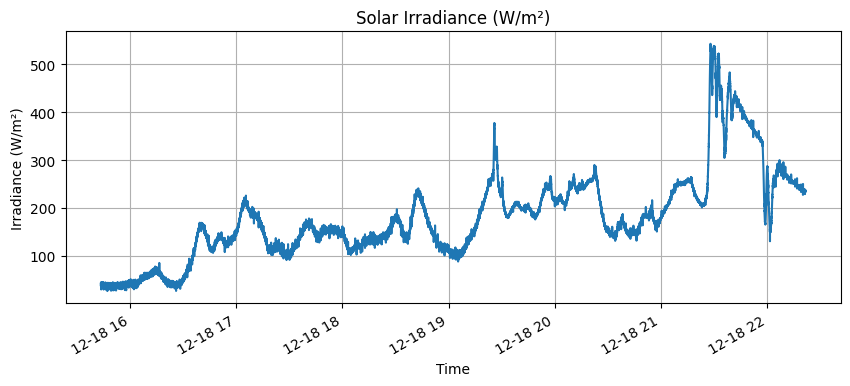

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the GSI data (use raw string for the path)
df = pd.read_csv(r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\pyranometer\2017_12_18.csv', header=None)

# Set column names
df.columns = ['unix_time', 'gsi_wm2']

# Convert UNIX time to datetime
df['timestamp'] = pd.to_datetime(df['unix_time'], unit='s')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Plot the data
df['gsi_wm2'].plot(figsize=(10, 4), title='Solar Irradiance (W/m²)')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.grid()
plt.show()


📊 Plotting Solar Irradiance Over Multiple Days


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of file paths for multiple days
file_paths = [
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\pyranometer\2017_12_18.csv',
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_19\pyranometer\2017_12_19.csv',
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_20\pyranometer\2017_12_20.csv'
]

# Create an empty DataFrame to hold all data
df_all = pd.DataFrame()

# Loop through each file
for file in file_paths:
    df = pd.read_csv(file, header=None)
    df.columns = ['unix_time', 'gsi_wm2']
    df['timestamp'] = pd.to_datetime(df['unix_time'], unit='s')
    df.set_index('timestamp', inplace=True)
    df_all = pd.concat([df_all, df[['gsi_wm2']]])

# Plot the full range
plt.figure(figsize=(14, 5))
df_all['gsi_wm2'].plot()
plt.title('Solar Irradiance Over Multiple Days')
plt.xlabel('Timestamp')
plt.ylabel('GSI (W/m²)')
plt.grid()
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Project Phase 1\\solar_forecasting_project\\GIRASOL_DATASET\\2017_12_19\\pyranometer\\2017_12_19.csv'

☀️ Sun Elevation vs Solar Irradiance Analysis

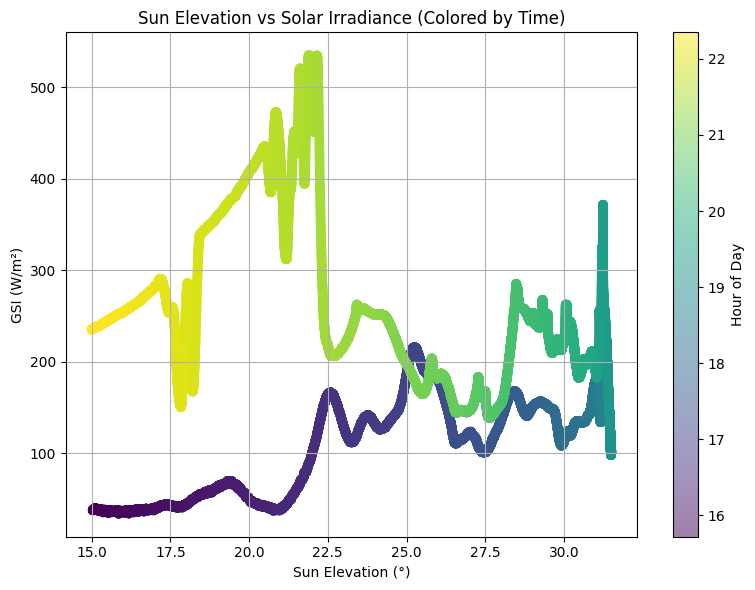


Correlation Matrix:
                gsi_wm2  elevation_deg   azimuth_deg
gsi_wm2        1.000000  -4.136842e-02  7.691013e-01
elevation_deg -0.041368   1.000000e+00  3.990218e-07
azimuth_deg    0.769101   3.990218e-07  1.000000e+00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load GSI Data ---
df_gsi = pd.read_csv(
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\pyranometer\2017_12_18.csv',
    header=None
)
df_gsi.columns = ['unix_time', 'gsi_wm2']
df_gsi['timestamp'] = pd.to_datetime(df_gsi['unix_time'], unit='s')
df_gsi.set_index('timestamp', inplace=True)
df_gsi.drop(columns='unix_time', inplace=True)

# --- Load Sun Position Data ---
df_sun = pd.read_csv(
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\sun_position\2017_12_18.csv',
    header=None
)
df_sun.columns = ['unix_time', 'elevation_deg', 'azimuth_deg']
df_sun['timestamp'] = pd.to_datetime(df_sun['unix_time'], unit='s')
df_sun.set_index('timestamp', inplace=True)
df_sun.drop(columns='unix_time', inplace=True)

# --- Merge Both DataFrames ---
df_combined = df_gsi.join(df_sun, how='inner')

# --- Optional: Smooth GSI with Rolling Mean ---
df_combined['gsi_smoothed'] = df_combined['gsi_wm2'].rolling(window=50).mean()

# --- Create 'hour of day' as color scale ---
df_combined['hour_decimal'] = df_combined.index.hour + df_combined.index.minute / 60

# --- Plot: Elevation vs Irradiance Colored by Time ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_combined['elevation_deg'],
    df_combined['gsi_smoothed'],
    c=df_combined['hour_decimal'],
    cmap='viridis',
    alpha=0.5
)
cbar = plt.colorbar(scatter)
cbar.set_label('Hour of Day')
plt.xlabel('Sun Elevation (°)')
plt.ylabel('GSI (W/m²)')
plt.title('Sun Elevation vs Solar Irradiance (Colored by Time)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Correlation Matrix ---
print("\nCorrelation Matrix:")
print(df_combined[['gsi_wm2', 'elevation_deg', 'azimuth_deg']].corr())


Analyze Weather Station Influence

In [4]:
df_weather = pd.read_csv('weather_station/2022_01_01.csv', header=None)
df_weather.columns = ['unix_time', 'temp_C', 'dewpoint_C', 'pressure_mmhg',
                      'wind_dir_rad', 'wind_vel_mps', 'humidity_percent']
df_weather['timestamp'] = pd.to_datetime(df_weather['unix_time'], unit='s')
df_weather.set_index('timestamp', inplace=True)

# Resample to match GSI
df_weather = df_weather.resample('1S').interpolate(method='linear')
df_weather = df_weather.loc[df_gsi.index.min():df_gsi.index.max()]

# Combine
df_full = df_gsi.join(df_weather)
sns.heatmap(df_full.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather and Irradiance")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'weather_station/2022_01_01.csv'

C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_35872\944654427.py:34: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_weather_resampled = df_weather.resample('1S').interpolate(method='linear')


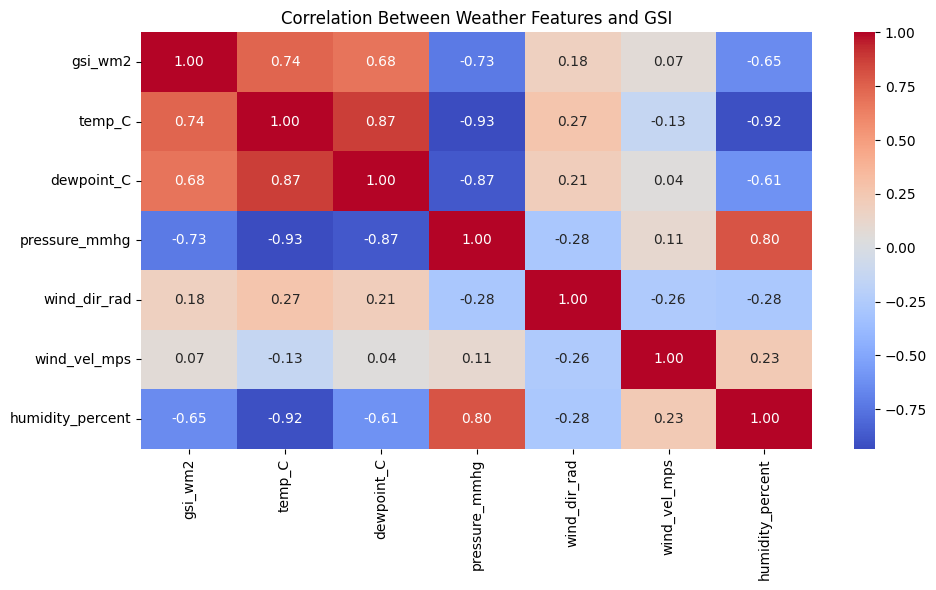

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load GSI Data ===
df_gsi = pd.read_csv(
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\pyranometer\2017_12_18.csv',
    header=None
)
df_gsi.columns = ['unix_time', 'gsi_wm2']
df_gsi['timestamp'] = pd.to_datetime(df_gsi['unix_time'], unit='s')
df_gsi['timestamp'] = df_gsi['timestamp'].dt.round('1s')  # 🔥 round to seconds
df_gsi.set_index('timestamp', inplace=True)
df_gsi.drop(columns='unix_time', inplace=True)

# === Load Weather Data ===
df_weather = pd.read_csv(
    r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\weather_station\2017_12_18.csv',
    header=None
)
df_weather.columns = [
    'unix_time', 'temp_C', 'dewpoint_C', 'pressure_mmhg',
    'wind_dir_rad', 'wind_vel_mps', 'humidity_percent'
]
df_weather['timestamp'] = pd.to_datetime(df_weather['unix_time'], unit='s')
df_weather['timestamp'] = df_weather['timestamp'].dt.round('1s')  # round to second
df_weather.set_index('timestamp', inplace=True)
df_weather.drop(columns='unix_time', inplace=True)

# ✅ Drop duplicate timestamps
df_weather = df_weather[~df_weather.index.duplicated(keep='first')]

# === Resample to 1-second frequency
df_weather_resampled = df_weather.resample('1S').interpolate(method='linear')

# === Trim to GSI time range
df_weather_resampled = df_weather_resampled.loc[df_gsi.index.min():df_gsi.index.max()]

# === Join GSI + Weather ===
df_full = df_gsi.join(df_weather_resampled)

# === Plot Correlation Heatmap ===
plt.figure(figsize=(10, 6))
sns.heatmap(df_full.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Weather Features and GSI")
plt.tight_layout()
plt.show()


In [6]:
print("GSI time range:")
print(df_gsi.index.min(), "→", df_gsi.index.max())

print("\nWeather time range:")
print(df_weather.index.min(), "→", df_weather.index.max())

print("\nWeather head (before resampling):")
print(df_weather.head())


GSI time range:
2017-12-18 15:43:25 → 2017-12-18 22:21:45

Weather time range:
2017-12-18 15:43:25 → 2017-12-18 22:21:45

Weather head (before resampling):
                       temp_C  dewpoint_C  pressure_mmhg  wind_dir_rad  \
timestamp                                                                
2017-12-18 15:43:25  1.046154   -5.611111        766.826      1.339867   
2017-12-18 15:43:26  1.047711   -5.611111        766.826      1.312351   
2017-12-18 15:43:27  1.049268   -5.611111        766.826      1.284851   
2017-12-18 15:43:28  1.051343   -5.611111        766.826      1.248171   
2017-12-18 15:43:29  1.052900   -5.611111        766.826      1.220666   

                     wind_vel_mps  humidity_percent  
timestamp                                            
2017-12-18 15:43:25      1.929152         61.292305  
2017-12-18 15:43:26      1.935416         61.285299  
2017-12-18 15:43:27      1.941677         61.278296  
2017-12-18 15:43:28      1.950029         61.268955  
2

In [13]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Image Analysis (IR or Visible)

TypeError: Image data of dtype object cannot be converted to float

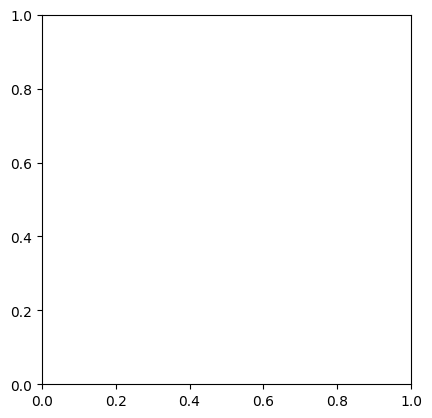

In [7]:
import cv2
import numpy as np
import os

# Load sample IR image
img = cv2.imread('GIRASOL_DATASET/2017_12_18/infrared/1672580240.png', cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='hot')
plt.title('Sample IR Image')
plt.colorbar()
plt.show()

print(f"Shape: {img.shape}, Mean: {np.mean(img):.2f}, Max: {np.max(img)}")


<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_16400\3299358089.py:8: SyntaxWarning: invalid escape sequence '\P'
  image_dir = 'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\infrared/'


Need at least 2 images.


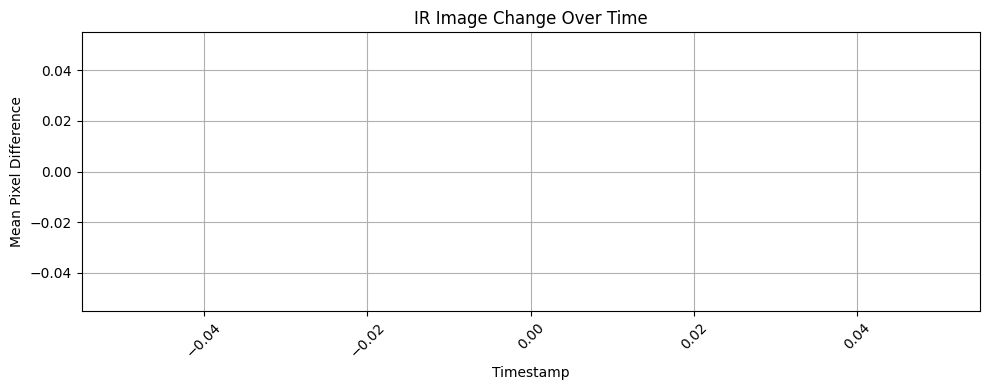

: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# === Load IR images ===
image_dir = 'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\infrared/'
file_paths = sorted(glob(os.path.join(image_dir, '*.png')))

# === Basic checks ===
if len(file_paths) < 2:
    print("Need at least 2 images.")
    exit()

# === Load images ===
frames = [cv2.imread(f, cv2.IMREAD_UNCHANGED).astype(np.float32) for f in file_paths]

# === Calculate mean change between consecutive frames ===
mean_changes = []
time_labels = []

for i in range(1, len(frames)):
    diff = cv2.absdiff(frames[i], frames[i - 1])
    mean_diff = np.mean(diff)
    mean_changes.append(mean_diff)
    
    # Use filename timestamp as label
    time_labels.append(os.path.basename(file_paths[i])[:-4])  # remove ".png"

# === Plot time series of change ===
plt.figure(figsize=(10, 4))
plt.plot(time_labels, mean_changes, marker='o')
plt.xticks(rotation=45)
plt.title('IR Image Change Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mean Pixel Difference')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# === Parameters ===
image_dir = r'D:\Project Phase 1\solar_forecasting_project\GIRASOL_DATASET\2017_12_18\infrared/'
file_paths = sorted(glob(os.path.join(image_dir, '*.png')))  # Sort chronologically

# === Check at least 2 frames available ===
if len(file_paths) < 2:
    print("Not enough IR images for change detection.")
    exit()

# === Load all frames ===
frames = [cv2.imread(f, cv2.IMREAD_UNCHANGED) for f in file_paths]

# === Compute frame-wise differences ===
for i in range(1, len(frames)):
    prev = frames[i - 1].astype(np.float32)
    curr = frames[i].astype(np.float32)
    
    # Compute absolute difference
    diff = cv2.absdiff(curr, prev)
    
    # Optional: Normalize difference
    norm_diff = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # === Display ===
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(prev, cmap='hot')
    plt.title(f'Frame {i-1}')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(curr, cmap='hot')
    plt.title(f'Frame {i}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(norm_diff, cmap='bwr')
    plt.title('Change Detection')
    plt.axis('off')
    
    plt.suptitle(f'Frame Difference: {os.path.basename(file_paths[i-1])} → {os.path.basename(file_paths[i])}')
    plt.tight_layout()
    plt.show()

    # Optional: Break after first diff to limit output
    # break


In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# === 1. Load and sort IR image files ===
image_dir = 'GIRASOL_DATASET/2017_12_18/infrared/'
file_paths = sorted(glob(os.path.join(image_dir, '*.png')))

# === 2. Extract UNIX timestamps from filenames ===
# Example: '1513611825IR.png' → 1513611825
timestamps = [int(os.path.basename(f).split('IR')[0]) for f in file_paths]

# === 3. Load frames and compute mean pixel differences ===
frames = [cv2.imread(f, cv2.IMREAD_UNCHANGED).astype(np.float32) for f in file_paths]

mean_changes = []
valid_timestamps = []

for i in range(1, len(frames)):
    diff = cv2.absdiff(frames[i], frames[i - 1])
    mean_diff = np.mean(diff)
    mean_changes.append(mean_diff)
    valid_timestamps.append(timestamps[i])  # use frame i's timestamp

# === 4. Build DataFrame from IR changes ===
df_ir = pd.DataFrame({
    'timestamp': pd.to_datetime(valid_timestamps, unit='s'),
    'ir_change': mean_changes
})
df_ir.set_index('timestamp', inplace=True)


In [8]:
# Join GSI and weather
df_combined = df_gsi.join(df_weather_resampled)

# Join IR change data (align by timestamp)
df_final = df_combined.join(df_ir, how='inner')  # or 'outer' if needed

# Drop rows with NaNs if needed
df_final.dropna(inplace=True)


In [11]:
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df_final, title="Solar + Weather + IR Change Profiling", explorative=True)

# Save it
profile.to_file("solar_ir_weather_profile.html")


d:\Project Phase 1\solar_forecasting_project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [9]:
!pip install ydata-profiling


  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.5-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached llvmlite-0.44.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.33.2-cp312-cp312-win_amd64.whl.metadata (6.9 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached charset_normalizer-3.4.2-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.7 MB/s eta 0:00:05
   ------ ------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\project phase 1\\solar_forecasting_project\\venv\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
